In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('D:\MLProjects\Medical\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#remember indexing starts from zero (0)
#dividing the dependent and independent features
X = df.iloc[:, :-1] #except last column remaining columns are stored in x variable
Y = df.iloc[:, 6] 

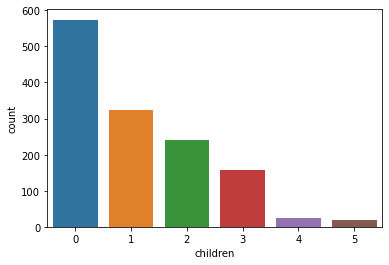

In [5]:
sns.countplot(x='children', data = df)
plt.show()

In [6]:
X.head() #there are 3 categorical columns

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
X.region.tail() #4 unique categories in region

1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, dtype: object

In [8]:
#now converting gender column to numerical by using one hot encoding by label encoding
# suppose if there are 4 unique categories we can use dummy varible trap --
#we will define 3 unique categories if 4 th category came then it the 3 defined will be zero 
X['sex'] = pd.get_dummies(X['sex'],drop_first=True)
X['smoker'] = pd.get_dummies(X['smoker'],drop_first=True)

df.sex=df['sex'].astype("category")
df.smoker=df['smoker'].astype("category")
df.region=df['region'].astype("category")

In [9]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,southwest
1,18,1,33.770,1,0,southeast
2,28,1,33.000,3,0,southeast
3,33,1,22.705,0,0,northwest
4,32,1,28.880,0,0,northwest


# Exploring the data

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
num_cols=df._get_numeric_data().columns.tolist()
print(num_cols)

['age', 'bmi', 'children', 'charges']


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
cat_cols=list(set(df.columns)-set(num_cols))
print(cat_cols)

['smoker', 'sex', 'region']


In [ ]:
#df.describe(include='category')

<function matplotlib.pyplot.show(close=None, block=None)>

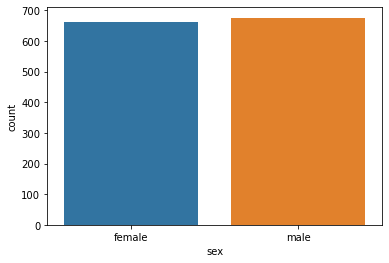

In [14]:
sns.countplot(x='sex', data = df)
plt.show

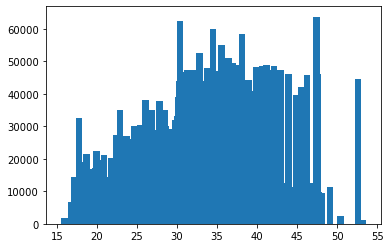

In [15]:
plt.bar(df['bmi'], df['charges'])
plt.show()

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
274/1064
#Mild imbalance

0.2575187969924812

In [18]:
X.region = X.region.map({'southeast':0, 'northwest':1, 'southwest':2,'northeast':3})

In [19]:
X['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [20]:
#from sklearn.preprocessing import OneHotEncoder

In [21]:
#df.sex= pd.get_dummies(df.sex, drop_first=True)

In [22]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


# Splitting 

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X)

In [24]:
X=pd.DataFrame(X_scaled,columns=X.columns)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,train_size=0.8, random_state=333)

In [26]:
class Linear_Regression():

  # initiating the parameters (learning rate & no. of iterations)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations


  def fit(self, X, Y ):

    # number of training examples & number of features

    self.m, self.n = X.shape  # number of rows & columns

    # initiating the weight and bias 

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent
    
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    # calculate gradients

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction)/self.m

    # upadating the weights
    
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db
 

  def predict(self, X):

    return X.dot(self.w) + self.b

plt.scatter( X_test, Y_test, color = 'red' )
#plt.plot( X_test, y_pred, color = 'blue' )    
plt.ylabel( 'Charges' )
plt.title( 'Medical Cost' )
plt.show()

from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))



In [27]:
model = Linear_Regression(learning_rate=0.02, no_of_iterations=1000)    

In [28]:
model.fit(X_train, Y_train)

In [29]:
y_pred = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(Y_test,y_pred))

MSE 34231344.2816147


In [31]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE 5850.755872672752


In [32]:
print("RMSE",np.log(np.sqrt(mean_squared_error(Y_test,y_pred))))

RMSE 8.674326140883027


In [33]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,y_pred)
print(r2)

0.7819978707968579


C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

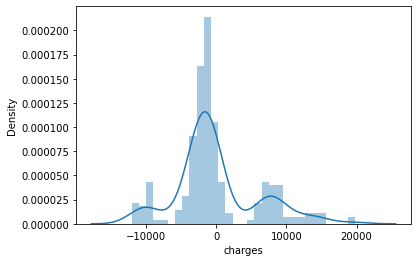

In [34]:
sns.distplot(Y_test-y_pred)

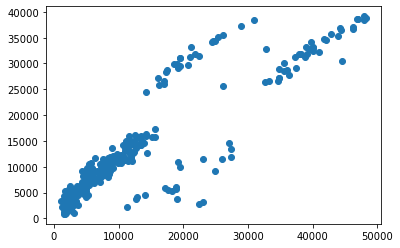

In [35]:
plt.scatter(Y_test,y_pred)

In [45]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

lasso=Pipeline([("scalar1",StandardScaler()),
                      ("Lasso",Lasso())])

ridge=Pipeline([("scalar2",StandardScaler()),
                      ("Ridge",Ridge())])

forest=Pipeline([("scalar3",StandardScaler()),
                      ("RandomForest",RandomForestRegressor())])


boost=Pipeline([("scalar4",StandardScaler()),
                      ("Gradient",GradientBoostingRegressor())])

xgboost =Pipeline([('scalar4',StandardScaler()),
                  ('XGBoost',xg.XGBRegressor())])

In [46]:
models = {'Lasso':Lasso(),'Ridge':Ridge(),'ElasticNet':ElasticNet(),'RandomForest':RandomForestRegressor(),
          'Gradient':GradientBoostingRegressor(),'XGBoost':XGBRegressor()}

In [53]:
for model_name,model in models.items():
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(f'RMSE  for {model_name}')
    print("RMSE",np.sqrt(mean_squared_error(Y_test,y_pred)))
    print(f'r2_score for  {model_name}')
    score = r2_score(Y_test,y_pred)  
    print(score)
    print('')

RMSE  for Lasso
RMSE 5788.3935145500345
r2_score for  Lasso
0.7866204094584178

RMSE  for Ridge
RMSE 5789.331801479319
r2_score for  Ridge
0.7865512270480648

RMSE  for ElasticNet
RMSE 10440.48070981561
r2_score for  ElasticNet
0.3058109298911411

RMSE  for RandomForest
RMSE 4907.986751051676
r2_score for  RandomForest
0.8465935767369356

RMSE  for Gradient
RMSE 4406.126600692666
r2_score for  Gradient
0.8763623550720392

RMSE  for XGBoost
RMSE 5230.53300511475
r2_score for  XGBoost
0.8257676980044573

